In [1]:
# Manipulating dataset
import pandas as pd
import numpy as np

# Cost of TP, TN, FP, FN

| type |  cost  |
| :--: |  :--:  |
|  TP  | 7500\$  |
|  TN  | 0\$     |
|  FP  | 1500\$  |
|  FN  | 30000\$ |

Average cost of each machine in given period in practice: around 30000\$.

In [2]:
# Importing CSV data to a pandas DataFrame, mergeing it
data_1 = pd.read_csv("data_1.csv", sep=",", header=0)
data_2 = pd.read_csv("data_2.csv", sep=",", header=0)
data = pd.concat([data_1, data_2])
data.reset_index(drop=True, inplace=True)

"""
    ID - ID of the machine
    DATE - date of the gathered data information in the row
    REGION_CLUSTER - region in which the machine is located
    MAINTENANCE_VENDOR - company that maintains the machine
    MANUFACTURER - manufacturer of the machine
    WELL_GROUP - type of the machine
    S5 - value of sensor 5
    S13 - value of sensor 13
    S15 - value of sensor 15
    S16 - value of sensor 16
    S17 - value of sensor 17
    S18 - value of sensor 18
    S19 - value of sensor 19
    S8 - value of sensor 8
    AGE_OF_EQUIPMENT - age of the machine in days
    
    EQUIPMENT_FAILURE - whether the machine failed at that time point (1 = failed)
"""

data

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.00,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.00,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.00,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.00,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.00,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307746,100617,11/27/16,C,P,S,7,29.520000,0.000000,48.99,3282.0,8.960800,0.2,22.500000,0,15.00,806
307747,100617,11/28/16,C,P,S,7,24.240000,0.000000,45.73,3064.0,11.201000,0.2,13.200000,0,11.10,807
307748,100617,11/29/16,C,P,S,7,28.560000,0.000000,46.40,3109.0,10.400400,0.2,16.100000,0,11.12,808
307749,100617,11/30/16,C,P,S,7,23.280000,0.000000,46.10,3089.0,12.052800,0.2,12.000000,0,11.28,809


In [3]:
# Check whether all the machines have logs for all days
# I.e. one record per machine per date
data = data.drop_duplicates()
data = data.dropna()
f"{len(data.groupby('DATE')) * len(data.groupby('ID')) == len(data)}, {len(data)}"

'True, 307751'

In [4]:
data.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000
mean,100310.826603,4.543943,14.585192,80.265541,35.018249,4675.848252,7.972097,9.069123,137.963064,0.001368,144.665715,2524.192399
std,177.574390,2.284121,8.817056,85.804273,14.446585,2521.074632,2.321949,16.898887,238.890128,0.036961,240.773926,3158.930976
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100161.000000,3.000000,7.694100,0.000000,28.200000,3209.000000,6.621500,0.900000,11.798276,0.000000,9.250000,721.000000
50%,100311.000000,5.000000,11.661600,31.680000,34.940000,4237.047619,8.004000,4.200000,38.200000,0.000000,53.080000,1113.000000
75%,100467.000000,6.000000,22.560000,160.080000,41.610000,5743.000000,9.460000,10.600000,150.900000,0.000000,165.092608,2784.000000
max,100617.000000,8.000000,59.040000,2555.520000,592.890000,52767.000000,24.600000,511.000000,4151.700000,1.000000,2068.110000,15170.000000


# Creating rolling summaries of mean, min, max, median over a period
Must not take two separate machines in one rolling summary!

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%d/%y')

# Sorting according to ID and date
data = data.sort_values(by=['ID', 'DATE'], ascending=[True, True])

# Flag for pointing out the next id 'started'
data['next_id'] = np.where((data.ID != data.ID.shift(1)), 1, 0)

data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,next_id
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0


In [6]:
# Defining summary window (number of records
# taken into account when calculating a summary)
summaries_window = 21

# Calculating summaries
tmp = data

# 1st record of each machine
first = data[data['next_id'] == 1]
first = first[['DATE', 'ID']]
first = first.rename(index=str, columns={'DATE': 'first_date'})
first['first_date'] = pd.to_datetime(first['first_date'], format='%Y-%m-%d')

# Merging to original data using IDs
tmp = tmp.sort_values(by=['ID', 'DATE'], ascending=[True, True])
first = first.sort_values(by=['ID'], ascending=[True])
tmp = tmp.merge(first, on=['ID'], how='left')

# Time since start (for determining which records are
# too early in time for window of summaries_window width)
tmp['days_since_start'] = (tmp['DATE'] - tmp['first_date']) / np.timedelta64(1, 'D')
tmp['too_early'] = np.where(tmp['days_since_start'] < summaries_window, 1, 0)

In [7]:
# Calculating rolling values for each sensor

for sensor in ['S5', 'S8', 'S13', 'S15', 'S16', 'S17', 'S18', 'S19']:
    tmp[f'{sensor}_mean'] = np.where((tmp.too_early == 0),(tmp[sensor].rolling(min_periods=1, window=summaries_window).mean()), tmp[sensor])
    tmp[f'{sensor}_median'] = np.where((tmp.too_early == 0),(tmp[sensor].rolling(min_periods=1, window=summaries_window).median()), tmp[sensor])
    tmp[f'{sensor}_max'] = np.where((tmp.too_early == 0),(tmp[sensor].rolling(min_periods=1, window=summaries_window).max()), tmp[sensor])
    tmp[f'{sensor}_min'] = np.where((tmp.too_early == 0),(tmp[sensor].rolling(min_periods=1, window=summaries_window).min()), tmp[sensor])

tmp

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,...,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,...,145.223448,145.223448,24.610345,24.610345,24.610345,24.610345,1.9,1.9,1.9,1.9
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,...,187.573214,187.573214,24.671429,24.671429,24.671429,24.671429,1.9,1.9,1.9,1.9
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,...,148.363704,148.363704,24.733333,24.733333,24.733333,24.733333,2.0,2.0,2.0,2.0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,...,133.660000,133.660000,24.773077,24.773077,24.773077,24.773077,2.0,2.0,2.0,2.0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,...,197.181600,197.181600,24.808000,24.808000,24.808000,24.808000,1.5,1.5,1.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307746,100617,2016-11-27,C,P,S,7,29.520000,0.000000,48.99,3282.0,...,0.000000,0.000000,17.423810,16.800000,22.800000,12.700000,0.2,0.2,0.2,0.2
307747,100617,2016-11-28,C,P,S,7,24.240000,0.000000,45.73,3064.0,...,0.000000,0.000000,17.185714,16.200000,22.800000,12.700000,0.2,0.2,0.2,0.2
307748,100617,2016-11-29,C,P,S,7,28.560000,0.000000,46.40,3109.0,...,0.000000,0.000000,16.980952,16.200000,22.800000,12.700000,0.2,0.2,0.2,0.2
307749,100617,2016-11-30,C,P,S,7,23.280000,0.000000,46.10,3089.0,...,0.000000,0.000000,16.638095,16.100000,22.800000,12.000000,0.2,0.2,0.2,0.2


In [8]:
# Calculating spikes in sensor values
for sensor in ['S5', 'S8', 'S13', 'S15', 'S16', 'S17', 'S18', 'S19']:
    tmp[f'{sensor}_change'] = np.where(tmp[f'{sensor}_mean'] == 0, 0, tmp[f'{sensor}'] / tmp[f'{sensor}_mean'])

data = tmp

# Expanding failure records

In [9]:
data = tmp.copy()
# Defining failure window (number of days considered
# as failure indicators before the actual failure)
failure_window = 28
data = data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
data.reset_index(drop=True, level=0, inplace=True)

# Extracting failure date for each machine's failure
tmp_failure = data[data['EQUIPMENT_FAILURE'] == 1]
tmp_failure = tmp_failure[['DATE', 'ID']]
tmp_failure = tmp_failure.rename(index=str, columns={'DATE': 'failure_date'})

# Appending extracted failure date to original data
data = data.sort_values(by=['ID'], ascending=[True])
tmp_failure = tmp_failure.sort_values(by=['ID'], ascending=[True])
data = data.merge(tmp_failure, on=['ID'], how='left')

# Calculate days until failure
data = data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
data['days_to_failure'] = (pd.to_datetime(data['failure_date']) - data['DATE']) / np.timedelta64(1, 'D')
data = data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
data.reset_index(drop=True, inplace=True)

# Adding an indicator whether a record is
# inside of a failure window (preceeds the
# failure by less than failure_window)
data['in_failure_window'] = np.where((data.days_to_failure < failure_window) & (data.days_to_failure >= 0), 1, 0)

data

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,...,S8_change,S13_change,S15_change,S16_change,S17_change,S18_change,S19_change,failure_date,days_to_failure,in_failure_window
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,...,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,2015-04-24,143.0,0
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,...,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,2015-04-24,142.0,0
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,...,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,2015-04-24,141.0,0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,...,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,2015-04-24,140.0,0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,...,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,2015-04-24,139.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307746,100617,2016-11-27,C,P,S,7,29.520000,0.000000,48.99,3282.0,...,1.164596,1.029150,1.241827,0.954744,0.0,1.291336,1.0,2016-09-21,-67.0,0
307747,100617,2016-11-28,C,P,S,7,24.240000,0.000000,45.73,3064.0,...,0.872609,0.964380,1.014833,1.170209,0.0,0.768080,1.0,2016-09-21,-68.0,0
307748,100617,2016-11-29,C,P,S,7,28.560000,0.000000,46.40,3109.0,...,0.896740,0.981032,1.191134,1.091317,0.0,0.948121,1.0,2016-09-21,-69.0,0
307749,100617,2016-11-30,C,P,S,7,23.280000,0.000000,46.10,3089.0,...,0.900787,0.974473,0.972779,1.254480,0.0,0.721236,1.0,2016-09-21,-70.0,0


# Splitting the dataset

In [10]:
# Obtaining unique IDs

tmp_id = data.copy()
id = tmp_id.drop_duplicates(subset='ID')
id = id[['ID']]
id

,ID
0,100001
731,100002
1462,100003
2193,100006
2924,100007
...,...
304096,100612
304827,100613
305558,100614
306289,100616


In [11]:
# Random number to each ID
np.random.seed(37)
id['rnd'] = (np.random.randint(0, 10000, id.shape[0])) / 10000
id

,ID,rnd
0,100001,0.1935
731,100002,0.4459
1462,100003,0.9036
2193,100006,0.0988
2924,100007,0.4118
...,...,...
304096,100612,0.5066
304827,100613,0.3899
305558,100614,0.7860
306289,100616,0.7633


In [12]:
# 45% to fall in training, 30% to fall in test,
# 25% to fall in validation

id['set'] = np.where(((id.rnd <= 0.456)), 'TRAINING', np.where(((id.rnd <= 0.65)), 'VALIDATION', 'TEST'))

# Merge set labels to original data
data = data.merge(id, on=['ID'], how='inner')

# Check for distribution
id.set.value_counts()

set
TRAINING      192
TEST          154
VALIDATION     75
Name: count, dtype: int64

In [13]:
# Dividing data
data_train = data[data['set'] == 'TRAINING']
data_train = data_train.drop(
    columns=[
        'next_id',
        'first_date',
        'days_since_start',
        'too_early',
        'failure_date',
        'days_to_failure',
        'rnd',
        'set'
        ]
    )

data_val = data[data['set'] == 'VALIDATION']
data_val = data_val.drop(
    columns=[
        'next_id',
        'first_date',
        'days_since_start',
        'too_early',
        'failure_date',
        'days_to_failure',
        'rnd',
        'set'
        ]
    )

data_train_val = data[data['set'] != 'TEST']
data_train_val = data_train_val.drop(
    columns=[
        'next_id',
        'first_date',
        'days_since_start',
        'too_early',
        'failure_date',
        'days_to_failure',
        'rnd',
        'set'
        ]
    )

data_test = data[data['set'] == 'TEST']
data_test = data_test.drop(
    columns=[
        'next_id',
        'first_date',
        'days_since_start',
        'too_early',
        'failure_date',
        'days_to_failure',
        'rnd',
        'set'
        ]
    )

len(data_train_val['ID'].unique())

267

# SMOTE algorithm

In [14]:
# Selecting features and target for SMOTE algorithm to synthesize data
smote_features = data_train[
    ['REGION_CLUSTER',
     'MAINTENANCE_VENDOR',
     'MANUFACTURER',
     'WELL_GROUP',
     'AGE_OF_EQUIPMENT',
     'S5', 'S8', 'S13', 'S15',
     'S16', 'S17', 'S18', 'S19',
     'S5_mean', 'S5_median', 'S5_max', 'S5_min',
     'S8_mean', 'S8_median', 'S8_max', 'S8_min',
     'S13_mean', 'S13_median', 'S13_max', 'S13_min',
     'S15_mean', 'S15_median', 'S15_max', 'S15_min',
     'S16_mean', 'S16_median', 'S16_max', 'S16_min',
     'S17_mean', 'S17_median', 'S17_max', 'S17_min',
     'S18_mean', 'S18_median', 'S18_max', 'S18_min',
     'S19_mean', 'S19_median', 'S19_max', 'S19_min',
     'S5_change', 'S8_change', 'S13_change', 'S15_change',
     'S16_change', 'S17_change', 'S18_change', 'S19_change'
     ]
]

smote_target = data_train[['in_failure_window']]

In [15]:
from imblearn.over_sampling import SMOTENC

synth = SMOTENC(random_state=12, categorical_features=[0, 1, 2, 3])
x_synth, y_synth = synth.fit_resample(smote_features, smote_target.values.ravel())

x_synth

,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,AGE_OF_EQUIPMENT,S5,S8,S13,S15,S16,...,S19_max,S19_min,S5_change,S8_change,S13_change,S15_change,S16_change,S17_change,S18_change,S19_change
0,G,O,Y,1,880,3501.000000,0.000000,39.340000,11.088000,8.426869,...,1.900000,1.900000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,G,O,Y,1,881,3489.000000,0.000000,39.200000,8.877943,6.483714,...,1.900000,1.900000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,G,O,Y,1,882,3459.000000,0.000000,38.870000,8.676444,6.159659,...,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,G,O,Y,1,883,3513.000000,0.000000,39.470000,9.988338,9.320308,...,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,G,O,Y,1,884,3589.000000,0.000000,40.330000,8.475264,8.022960,...,1.500000,1.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269983,D,L,S,6,3517,4074.349375,102.990233,46.082773,6.906007,11.959865,...,1.767225,0.384179,1.098332,0.727969,1.098344,0.891749,1.189761,1.100939,0.944452,1.137762
269984,C,K,S,7,561,2788.887352,96.721825,41.628058,24.050794,9.254101,...,2.000000,0.100000,1.032949,1.070719,1.033022,1.078278,1.066229,0.000000,1.044857,1.924853
269985,H,K,R,7,1123,7858.623055,156.571000,36.895183,27.956022,2.683456,...,9.700000,0.000000,1.016885,1.432865,1.016904,1.366885,1.150857,0.000000,1.525790,0.000000
269986,B,I,R,6,5488,4056.057263,298.204676,34.082983,25.938897,9.867341,...,13.900000,1.900000,0.962674,1.078095,0.962614,1.009027,1.201766,0.000000,0.000000,0.221583


In [16]:
# Converting SMOTENC outputs to dataframes
smote_x = pd.DataFrame(x_synth)
smote_y = pd.DataFrame(y_synth)
#smote_y=df_y, smote_x= df_x
data_train_bal = pd.concat([smote_y, smote_x], axis=1).rename(columns={0: 'in_failure_window'})
data_train_bal

,in_failure_window,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,AGE_OF_EQUIPMENT,S5,S8,S13,S15,...,S19_max,S19_min,S5_change,S8_change,S13_change,S15_change,S16_change,S17_change,S18_change,S19_change
0,0,G,O,Y,1,880,3501.000000,0.000000,39.340000,11.088000,...,1.900000,1.900000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,G,O,Y,1,881,3489.000000,0.000000,39.200000,8.877943,...,1.900000,1.900000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0,G,O,Y,1,882,3459.000000,0.000000,38.870000,8.676444,...,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0,G,O,Y,1,883,3513.000000,0.000000,39.470000,9.988338,...,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0,G,O,Y,1,884,3589.000000,0.000000,40.330000,8.475264,...,1.500000,1.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269983,1,D,L,S,6,3517,4074.349375,102.990233,46.082773,6.906007,...,1.767225,0.384179,1.098332,0.727969,1.098344,0.891749,1.189761,1.100939,0.944452,1.137762
269984,1,C,K,S,7,561,2788.887352,96.721825,41.628058,24.050794,...,2.000000,0.100000,1.032949,1.070719,1.033022,1.078278,1.066229,0.000000,1.044857,1.924853
269985,1,H,K,R,7,1123,7858.623055,156.571000,36.895183,27.956022,...,9.700000,0.000000,1.016885,1.432865,1.016904,1.366885,1.150857,0.000000,1.525790,0.000000
269986,1,B,I,R,6,5488,4056.057263,298.204676,34.082983,25.938897,...,13.900000,1.900000,0.962674,1.078095,0.962614,1.009027,1.201766,0.000000,0.000000,0.221583


# Converting categorical fields to binary fields

In [17]:
# Creating a new dataframe which holds only binary and continuous data
def to_binary_fields(df):
    tmp = pd.get_dummies(df['REGION_CLUSTER'])
    for col in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
        if col in tmp.columns:
            tmp = tmp.rename(columns={col: f'R_CLST_{col}'})
        else:
            tmp[f'R_CLST_{col}'] = False
    df = pd.concat([df, tmp], axis=1)
    
    tmp = pd.get_dummies(df['MAINTENANCE_VENDOR'])
    for col in ['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']:
        if col in tmp.columns:
            tmp = tmp.rename(columns={col: f'MNTC_VND_{col}'})
        else:
            tmp[f'MNTC_VND_{col}'] = False
    df = pd.concat([df, tmp], axis=1)
    
    tmp = pd.get_dummies(df['MANUFACTURER'])
    for col in ['Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
        if col in tmp.columns:
            tmp = tmp.rename(columns={col: f'MFTR_{col}'})
        else:
            tmp[f'MFTR_{col}'] = False
    df = pd.concat([df, tmp], axis=1)
    
    tmp = pd.get_dummies(df['WELL_GROUP'])
    for col in [1, 2, 3, 4, 5, 6, 7, 8]:
        if col in tmp.columns:
            tmp = tmp.rename(columns={col: f'WG_{col}'})
        else:
            tmp[f'WG_{col}'] = False
    df = pd.concat([df, tmp], axis=1)

    df = df.drop(columns=['REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER', 'WELL_GROUP'])
    df = df.reindex(sorted(df.columns), axis=1)

    return df

In [18]:
data_train_bin = to_binary_fields(data_train.copy())
data_train_bin

,AGE_OF_EQUIPMENT,DATE,EQUIPMENT_FAILURE,ID,MFTR_Q,MFTR_R,MFTR_S,MFTR_T,MFTR_U,MFTR_V,...,S8_min,WG_1,WG_2,WG_3,WG_4,WG_5,WG_6,WG_7,WG_8,in_failure_window
0,880,2014-12-02,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
1,881,2014-12-03,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
2,882,2014-12-04,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
3,883,2014-12-05,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
4,884,2014-12-06,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307746,806,2016-11-27,0,100617,False,False,True,False,False,False,...,8.68,False,False,False,False,False,False,True,False,0
307747,807,2016-11-28,0,100617,False,False,True,False,False,False,...,8.68,False,False,False,False,False,False,True,False,0
307748,808,2016-11-29,0,100617,False,False,True,False,False,False,...,8.68,False,False,False,False,False,False,True,False,0
307749,809,2016-11-30,0,100617,False,False,True,False,False,False,...,8.68,False,False,False,False,False,False,True,False,0


In [19]:
data_train_bal_bin = to_binary_fields(data_train_bal.copy())
data_train_bal_bin

,AGE_OF_EQUIPMENT,MFTR_Q,MFTR_R,MFTR_S,MFTR_T,MFTR_U,MFTR_V,MFTR_W,MFTR_X,MFTR_Y,...,S8_min,WG_1,WG_2,WG_3,WG_4,WG_5,WG_6,WG_7,WG_8,in_failure_window
0,880,False,False,False,False,False,False,False,False,True,...,0.00000,True,False,False,False,False,False,False,False,0
1,881,False,False,False,False,False,False,False,False,True,...,0.00000,True,False,False,False,False,False,False,False,0
2,882,False,False,False,False,False,False,False,False,True,...,0.00000,True,False,False,False,False,False,False,False,0
3,883,False,False,False,False,False,False,False,False,True,...,0.00000,True,False,False,False,False,False,False,False,0
4,884,False,False,False,False,False,False,False,False,True,...,0.00000,True,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269983,3517,False,False,True,False,False,False,False,False,False,...,0.00000,False,False,False,False,False,True,False,False,1
269984,561,False,False,True,False,False,False,False,False,False,...,25.22000,False,False,False,False,False,False,True,False,1
269985,1123,False,True,False,False,False,False,False,False,False,...,1.98000,False,False,False,False,False,False,True,False,1
269986,5488,False,True,False,False,False,False,False,False,False,...,245.67284,False,False,False,False,False,True,False,False,1


In [20]:
data_val_bin = to_binary_fields(data_val.copy())
data_val_bin

,AGE_OF_EQUIPMENT,DATE,EQUIPMENT_FAILURE,ID,MFTR_Q,MFTR_R,MFTR_S,MFTR_T,MFTR_U,MFTR_V,...,S8_min,WG_1,WG_2,WG_3,WG_4,WG_5,WG_6,WG_7,WG_8,in_failure_window
3655,320,2014-12-02,0,100009,False,False,False,False,False,False,...,0.00,False,False,True,False,False,False,False,False,0
3656,321,2014-12-03,0,100009,False,False,False,False,False,False,...,0.00,False,False,True,False,False,False,False,False,0
3657,322,2014-12-04,0,100009,False,False,False,False,False,False,...,0.00,False,False,True,False,False,False,False,False,0
3658,323,2014-12-05,0,100009,False,False,False,False,False,False,...,0.00,False,False,True,False,False,False,False,False,0
3659,324,2014-12-06,0,100009,False,False,False,False,False,False,...,0.00,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304822,1086,2016-11-27,0,100612,False,False,False,False,False,True,...,35.22,False,False,False,True,False,False,False,False,0
304823,1087,2016-11-28,0,100612,False,False,False,False,False,True,...,35.22,False,False,False,True,False,False,False,False,0
304824,1088,2016-11-29,0,100612,False,False,False,False,False,True,...,35.22,False,False,False,True,False,False,False,False,0
304825,1089,2016-11-30,0,100612,False,False,False,False,False,True,...,35.22,False,False,False,True,False,False,False,False,0


In [21]:
data_test_bin = to_binary_fields(data_test.copy())
data_test_bin

,AGE_OF_EQUIPMENT,DATE,EQUIPMENT_FAILURE,ID,MFTR_Q,MFTR_R,MFTR_S,MFTR_T,MFTR_U,MFTR_V,...,S8_min,WG_1,WG_2,WG_3,WG_4,WG_5,WG_6,WG_7,WG_8,in_failure_window
1462,400,2014-12-02,0,100003,False,False,False,True,False,False,...,0.00,True,False,False,False,False,False,False,False,0
1463,401,2014-12-03,0,100003,False,False,False,True,False,False,...,0.00,True,False,False,False,False,False,False,False,0
1464,402,2014-12-04,0,100003,False,False,False,True,False,False,...,0.00,True,False,False,False,False,False,False,False,0
1465,403,2014-12-05,0,100003,False,False,False,True,False,False,...,0.00,True,False,False,False,False,False,False,False,0
1466,404,2014-12-06,0,100003,False,False,False,True,False,False,...,0.00,True,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307015,1286,2016-11-27,0,100616,False,False,True,False,False,False,...,726.15,False,False,False,False,False,False,False,True,0
307016,1287,2016-11-28,0,100616,False,False,True,False,False,False,...,726.15,False,False,False,False,False,False,False,True,0
307017,1288,2016-11-29,0,100616,False,False,True,False,False,False,...,726.15,False,False,False,False,False,False,False,True,0
307018,1289,2016-11-30,0,100616,False,False,True,False,False,False,...,726.15,False,False,False,False,False,False,False,True,0


In [22]:
data_train_val_bin = to_binary_fields(data_train_val.copy())
data_train_val_bin

,AGE_OF_EQUIPMENT,DATE,EQUIPMENT_FAILURE,ID,MFTR_Q,MFTR_R,MFTR_S,MFTR_T,MFTR_U,MFTR_V,...,S8_min,WG_1,WG_2,WG_3,WG_4,WG_5,WG_6,WG_7,WG_8,in_failure_window
0,880,2014-12-02,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
1,881,2014-12-03,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
2,882,2014-12-04,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
3,883,2014-12-05,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
4,884,2014-12-06,0,100001,False,False,False,False,False,False,...,0.00,True,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307746,806,2016-11-27,0,100617,False,False,True,False,False,False,...,8.68,False,False,False,False,False,False,True,False,0
307747,807,2016-11-28,0,100617,False,False,True,False,False,False,...,8.68,False,False,False,False,False,False,True,False,0
307748,808,2016-11-29,0,100617,False,False,True,False,False,False,...,8.68,False,False,False,False,False,False,True,False,0
307749,809,2016-11-30,0,100617,False,False,True,False,False,False,...,8.68,False,False,False,False,False,False,True,False,0


# Building the model

In [23]:
# XGB model parameters
estimator_vals=160
lr_vals = 0.8
md_vals = 12
mcw_vals = 0.5
gamma_vals =.1
subsample_vals = .5
c_bt_vals = 1
reg_lambda_vals = 1
reg_alpha_vals = 1

In [24]:
from xgboost import XGBClassifier

# Instantiating classifier
xgb0 = XGBClassifier(
    objective = 'binary:logistic',
    use_label_encoder=False,
    learning_rate = lr_vals,
    n_estimators=estimator_vals,
    max_depth=md_vals,
    min_child_weight=mcw_vals,
    gamma=gamma_vals,
    subsample=subsample_vals,
    colsample_bytree=c_bt_vals,
    reg_lambda=reg_lambda_vals,
    reg_alpha=reg_alpha_vals,
    eval_metric='error'
)


In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

def plot_model(model, X, y):
    y_hat = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    # Feature importance
    f_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
    f_imp.plot(kind='bar', title='Feature importance')

    print(f"Accuracy: {metrics.accuracy_score(y['in_failure_window'].values, y_hat)}")
    print(f"AUC Score (Balanced): {metrics.roc_auc_score(y['in_failure_window'], y_prob)}")
    

In [26]:
# Retreiving X, y and feature labels
X_train = data_train_bal_bin.drop(columns=['in_failure_window'])
y_train = pd.DataFrame(data_train_bal_bin['in_failure_window'])
X_val = data_val_bin.drop(columns=['ID', 'DATE', 'in_failure_window', 'EQUIPMENT_FAILURE'])
y_val = data_val_bin[['in_failure_window', 'EQUIPMENT_FAILURE']]
feature_labels = [col for col in X_train.columns]

X_train = X_train.apply(pd.to_numeric)
y_train = y_train.apply(pd.to_numeric)
X_val = X_val.apply(pd.to_numeric)
y_val = y_val.apply(pd.to_numeric)

In [27]:
xgb0.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.9570269037847697
AUC Score (Balanced): 0.5809819174743496


Index(['AGE_OF_EQUIPMENT', 'MFTR_Q', 'MFTR_R', 'MFTR_S', 'MFTR_T', 'MFTR_U',
       'MFTR_V', 'MFTR_W', 'MFTR_X', 'MFTR_Y', 'MFTR_Z', 'MNTC_VND_I',
       'MNTC_VND_J', 'MNTC_VND_K', 'MNTC_VND_L', 'MNTC_VND_M', 'MNTC_VND_N',
       'MNTC_VND_O', 'MNTC_VND_P', 'R_CLST_A', 'R_CLST_B', 'R_CLST_C',
       'R_CLST_D', 'R_CLST_E', 'R_CLST_F', 'R_CLST_G', 'R_CLST_H', 'S13',
       'S13_change', 'S13_max', 'S13_mean', 'S13_median', 'S13_min', 'S15',
       'S15_change', 'S15_max', 'S15_mean', 'S15_median', 'S15_min', 'S16',
       'S16_change', 'S16_max', 'S16_mean', 'S16_median', 'S16_min', 'S17',
       'S17_change', 'S17_max', 'S17_mean', 'S17_median', 'S17_min', 'S18',
       'S18_change', 'S18_max', 'S18_mean', 'S18_median', 'S18_min', 'S19',
       'S19_change', 'S19_max', 'S19_mean', 'S19_median', 'S19_min', 'S5',
       'S5_change', 'S5_max', 'S5_mean', 'S5_median', 'S5_min', 'S8',
       'S8_change', 'S8_max', 'S8_mean', 'S8_median', 'S8_min', 'WG_1', 'WG_2',
       'WG_3', 'WG_4', 'W

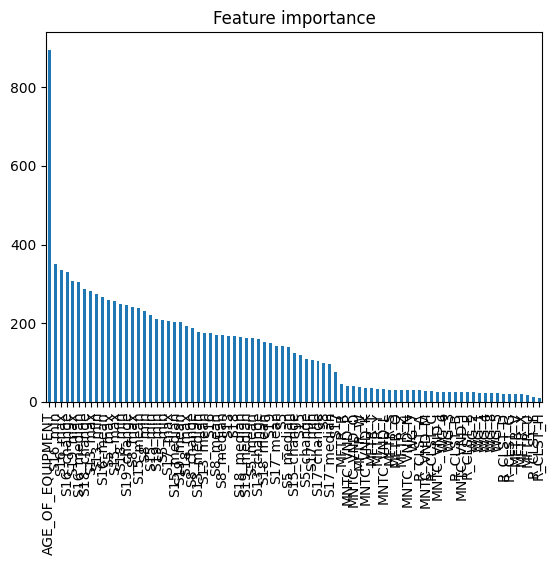

In [28]:
plot_model(xgb0, X_val, y_val)
X_val.columns

In [29]:
# Confusion matrix for test data - not really realistic
# If we have faliure indicators on days before the failure, but
# not the day of the failure itself, the days before are counted
# as FP while the day of the failure is FN (we need another
# definition of FP, FN, TP, TN - for this purpose)
y_val['predict_prob'] = xgb0.predict_proba(X_val)[:, 1]
y_val['predict'] = np.where(y_val.predict_prob < 0.5, 0, 1)

print(f"Accuracy : {metrics.accuracy_score(y_val['in_failure_window'].values, y_val['predict'])}")
print(f"AUC Score: {metrics.roc_auc_score(y_val['in_failure_window'], y_val['predict_prob'])}")

print(pd.crosstab(y_val.predict, y_val.EQUIPMENT_FAILURE, dropna=False))

Accuracy : 0.9570269037847697
AUC Score: 0.5809819174743496
EQUIPMENT_FAILURE      0   1
predict                     
0                  54411  69
1                    339   6


# Defining adequate TP, TN, FP, FN

First, we need to define forecast window (how many days the signal goes to the future). For example, if the forecast window is 10 days, that means that the model predicted the machine will fail in the next 10 days, beginning from the failure warning.
Second, we need to define a cut-off value - which probability is considered a positive, and which a negative prediction.

Next, we need to eliminate redundant failure signals, i.e. ensure that there is at least `forecast_window`days in between each two failures. I.e. each failure that appears less than `forecast_window` days after the previous failure is considered a signal for the same failure event.

In [30]:
forecast_window = 90 # days
cutoff = 0.2

# How much days after a false positive failure
# warning will there be no warning?
false_positive_window = 14 # days

# Checking number of machines (421 in whole dataset)
df = data_train_val_bin.copy()


In [516]:
# Function that assigns TP, TN, FP, FN to each record in the DataFrame

def set_ftpn(df, forecast_window, gt_label='EQUIPMENT_FAILURE', pred_label='pred'):
    # Labeling machines with sequential IDs

    # Temp dataframe for labeling purposes ???
    machines = df.copy()
    machines = machines.sort_values(by=['ID', 'DATE'], ascending=[True, True])
    
    # Preserving only unique IDs
    machines = machines.drop_duplicates(subset='ID')
    machines = machines[['ID']]
    
    # Label machines with a sequential ID
    machines = machines.reset_index(drop=True).reset_index(drop=False)
    machines = machines.rename(columns={'index': 'label'})
    machines['label'] = machines['label'] + 1
    no_machines = len(machines)

    # Merging sequential IDs to classified training+validation dataframe
    df = df.sort_values(by=['ID'], ascending=[True])
    machines = machines.sort_values(by=['ID'], ascending=[True])
    df = df.merge(machines, on=['ID'], how='inner')
    
    # Sorting, resetting index
    df = df.sort_values(by=['ID', 'DATE'], ascending=[True, True])
    df = df.reset_index(drop=True)
    
    # Temp dataframe for output
    tmp = df.copy()
    tmp = tmp[tmp['label'] > no_machines]

    # -------------
    
    # Searching for TP, FN, FP, FN for each machine (each ID)
    for id in range(1, no_machines + 1):
        current_records = df[df['label'] == id]
        curr = current_records.copy()
        curr = curr.reset_index(drop=True)
        n_records = len(curr)
        curr['result'] = 'NO_RESULT'
    
        # Ground-truth fail indices (TP and FN)
        gtf_indices = np.where(curr['EQUIPMENT_FAILURE'] == 1)[0]
        for i in gtf_indices:
            if np.sum(curr.loc[max(0, i - (forecast_window - 1)):i, 'pred']) > 0:
                # There was a failure signal in the forecasted window before today
                # True positive
                # Setting the whole window as a true negative apart from the record
                # of the actual failure's date (we will only check the machine once in the
                # period in which a signal for failure was given - only for cost
                # calculation purposes (TN costs 0$, TP costs something)...)
                curr.loc[i, 'result'] = 'TRUE_POSITIVE'
                curr.loc[max(0, i - (forecast_window - 1)):max(0, i - 1), 'result'] = 'TRUE_NEGATIVE'
                
                # Previous approach
                # curr.loc[max(0, i - (forecast_window - 1)):i, 'pred'] = 1
                # curr.loc[max(0, i - (forecast_window - 1)):i, 'result'] = 'TRUE_POSITIVE'
            else:
                # There was not a single failure signal in the forecasted window before today
                # False negative (only one per forecast period - because of cost calculation)
                curr.loc[i, 'result'] = 'FALSE_NEGATIVE'
                
                # Setting the whole window to false negative
                # curr.loc[max(0, i - (forecast_window - 1)):i, 'result'] = 'FALSE_NEGATIVE'
    
        # Classified fails which were not considered before
        # because they are more than forecast_window days before any ground-truth fail
        cf_indices = np.where((curr['pred'] == 1) & (curr['result'] == 'NO_RESULT'))[0]
        for i in cf_indices:
            if curr.loc[i, 'result'] != 'NO_RESULT': continue
            
            if np.sum(curr.loc[i:min(n_records, i + (forecast_window - 1)), 'EQUIPMENT_FAILURE']) <= 0:
                # No ground-truth failures in the next forecast_window days
                # Mark as false positive
                # Mark the next forecast_window days as true negative (because
                # of cost calculation, we will check the machine only once)
                curr.loc[i, 'result'] = 'FALSE_POSITIVE'
                curr.loc[(curr['result'] == 'NO_RESULT') & (curr.index > i) & (curr.index <= min(n_records, i + false_positive_window - 1)), 'result'] = 'TRUE_NEGATIVE'
                
                # Other metrics test
                # curr.loc[i, 'result'] = f"FALSE_POSITIVE_{np.sum(curr.loc[i-90:min(n_records, i + 90), 'EQUIPMENT_FAILURE'])}"
                
                # Setting the whole window to predict 1 and false positive
                #curr.loc[i:min(n_records, i + (forecast_window - 1)), 'pred'] = 1
                #curr.loc[i:min(n_records, i + (forecast_window - 1)), 'result'] = 'FALSE_POSITIVE'
            else:
                # There are ground-truth failures in the next forecast_window days
                # Shouldn't be any cases of this sort, just in case :S
                curr.loc[i, 'result'] = 'TRUE_POSITIVE'
                curr.loc[min(i + 1, n_records):min(n_records, i + (forecast_window - 1)), 'result'] = 'TRUE_NEGATIVE'
    
        # We found all TP, FN and FP cases, the rest is TN
        curr.loc[curr['result'] == 'NO_RESULT', 'result'] = 'TRUE_NEGATIVE' 

        # Append to the resulting DataFrame
        tmp = pd.concat([tmp, curr])
    tmp.reset_index(drop=True)
    
    return tmp

In [519]:
df = data_test_bin.copy()
print(f"Number of machines: {len(df['ID'].unique())}") # Check (< 421)

# Evaluating training+validation dataset
df_X, df_y = df.drop(columns=['ID', 'DATE', 'EQUIPMENT_FAILURE', 'in_failure_window']), pd.DataFrame(df['in_failure_window'])

# Running classifier
df['pred_prob'] = xgb0.predict_proba(df_X)[:, 1]
df['pred'] = np.where(df.pred_prob < cutoff, 0, 1)

# Defining TP, TN, FP, FN for each record
fptn = set_ftpn(df.copy(), forecast_window)
print(fptn.result.value_counts())

print(f"Average cost per machine: {(((fptn['result'] == 'FALSE_POSITIVE').sum() * 1500) + ((fptn['result'] == 'TRUE_POSITIVE').sum() * 7500) + ((fptn['result'] == 'FALSE_NEGATIVE').sum() * 30000)) / len(df['ID'].unique())}$")


Number of machines: 154
result
TRUE_NEGATIVE     111866
FALSE_POSITIVE       554
FALSE_NEGATIVE        96
TRUE_POSITIVE         58
Name: count, dtype: int64
Average cost per machine: 26922.077922077922$
